In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

neighborhoods_path = '../datasets/neighborhoods.geojson'

# Read in the neighborhoods geojson file
neighborhoods = gpd.read_file(neighborhoods_path)

school_districts_path = '../datasets/school_districts.geojson'

school_districts = gpd.read_file(school_districts_path)

art = gpd.read_file('../datasets/public_art.csv')

# Create a geometry column from lng & lat
art['geometry'] = art.apply(lambda x: Point(float(x.Longitude), float(x.Latitude)), axis=1)

# Create a GeoDataFrame from art and verify the type
art_geo = gpd.GeoDataFrame(art, crs = neighborhoods.crs, geometry = art.geometry)

# Spatially join neighborhoods with art_geo
neighborhood_art = gpd.sjoin(art_geo, neighborhoods, op = "within")

# Create urban_art from neighborhood_art where the neighborhood name is Urban Residents
urban_art = neighborhood_art.loc[neighborhood_art.name == "Urban Residents"]

# Get just the Urban Residents neighborhood polygon and save it as urban_polygon
urban_polygon = neighborhoods.loc[neighborhoods.name == "Urban Residents"]

# Find the area of the Urban Residents neighborhood
How big is the Urban Residents neighborhood?

In [2]:
# Print the head of the urban polygon 
print(urban_polygon.head())

# Create a copy of the urban_polygon using EPSG:3857 and print the head
urban_poly_3857 = urban_polygon.to_crs(epsg = 3857)
print(urban_poly_3857.head())



               name                                           geometry
41  Urban Residents  MULTIPOLYGON (((-86.78122 36.16457, -86.78205 ...
               name                                           geometry
41  Urban Residents  MULTIPOLYGON (((-9660441.281 4323289.005, -966...


In [3]:
area = urban_poly_3857.geometry.area / 10**6

In [4]:
print('The area of the Urban Residents neighborhood is ', area.values, ' km squared')

The area of the Urban Residents neighborhood is  [1.12898961]  km squared


# The center of the Urban Residents neighborhood
Now you'll find the center point of the urban_poly_3857 and plot it over the polygon.

<class 'geopandas.geoseries.GeoSeries'>


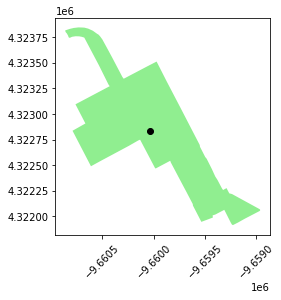

In [5]:
# Create downtown_center from urban_poly_3857
downtown_center = urban_poly_3857.geometry.centroid

# Print the type of downtown_center 
print(type(downtown_center))

# Plot the urban_poly_3857 as ax and add the center point
ax = urban_poly_3857.plot(color = 'lightgreen')
downtown_center.plot(ax = ax, color = 'black')
plt.xticks(rotation = 45)

# Show the plot
plt.show()

# Prepare to calculate distances
In this exercise you will prepare a GeoDataFrame called art_dist_meters with the locations of downtown art converted to meters using EPSG:3857. You will use art_dist_meters in the next exercise to calculate the distance of each artwork from the center of the Urban Residents neighborhood in meters.

The art data is in your workspace, along with urban_poly_3857 and center_point, the center point of the Urban Residents neighborhood. A geometry column called geometry that uses degrees has already been created in the art DataFrame.

In [6]:
# Import packages
from shapely.geometry import Point
import geopandas as gpd
import pandas as pd

center_point = art.geometry.centroid

# Create art_dist_meters using art and the geometry from art
art_dist_meters = gpd.GeoDataFrame(art, geometry = art.geometry, crs = {'init': 'epsg:4326'})
print(art_dist_meters.head(2))

# Set the crs of art_dist_meters to use EPSG:3857
art_dist_meters.geometry = art_dist_meters.geometry.to_crs(epsg = 3857)
print(art_dist_meters.head(2))

# Add a column to art_meters, center
art_dist_meters['center'] = center_point

                             Title Last Name First Name  \
0          [Cross Country Runners]     Frost      Miley   
1  [Fourth and Commerce Sculpture]    Walker        Lin   

                            Location  Medium       Type Description  Latitude  \
0     4001 Harding Rd., Nashville TN  Bronze  Sculpture              36.12856   
1  333 Commerce Street, Nashville TN          Sculpture              36.16234   

   Longitude        Mapped Location                    geometry  
0   -86.8366   (36.12856, -86.8366)  POINT (-86.83660 36.12856)  
1  -86.77774  (36.16234, -86.77774)  POINT (-86.77774 36.16234)  
                             Title Last Name First Name  \
0          [Cross Country Runners]     Frost      Miley   
1  [Fourth and Commerce Sculpture]    Walker        Lin   

                            Location  Medium       Type Description  Latitude  \
0     4001 Harding Rd., Nashville TN  Bronze  Sculpture              36.12856   
1  333 Commerce Street, Nashville TN    

# Art distances from neighborhood center
Now that you have the center point and the art locations in the units we need to calculate distances in meters, it's time to perform that step.

In [7]:
art_dist_meters

,Title,Last Name,First Name,Location,Medium,Type,Description,Latitude,Longitude,Mapped Location,geometry,center
0,[Cross Country Runners],Frost,Miley,"4001 Harding Rd., Nashville TN",Bronze,Sculpture,,36.12856,-86.8366,"(36.12856, -86.8366)",POINT (-9666606.094 4318325.479),POINT (-86.83660 36.12856)
1,[Fourth and Commerce Sculpture],Walker,Lin,"333 Commerce Street, Nashville TN",,Sculpture,,36.16234,-86.77774,"(36.16234, -86.77774)",POINT (-9660053.829 4322982.159),POINT (-86.77774 36.16234)
2,12th & Porter Mural,Kennedy,Kim,114 12th Avenue N,Porter all-weather outdoor paint,Mural,Kim Kennedy is a musician and visual artist wh...,36.1579,-86.78817,"(36.1579, -86.78817)",POINT (-9661214.891 4322369.977),POINT (-86.78817 36.15790)
3,A Splash of Color,Stevenson and Stanley and ROFF (Harroff),Doug and Ronnica and Lynn,616 17th Ave. N.,"Steel, brick, wood, and fabric on frostproof c...",Mural,Painted wooden hoop dancer on a twenty foot po...,36.16202,-86.79975,"(36.16202, -86.79975)",POINT (-9662503.971 4322938.037),POINT (-86.79975 36.16202)
4,A Story of Nashville,Ridley,Greg,"615 Church Street, Nashville TN",Hammered copper repousse,Frieze,"Inside the Grand Reading Room, this is a serie...",36.16215,-86.78205,"(36.16215, -86.78205)",POINT (-9660533.616 4322955.961),POINT (-86.78205 36.16215)
...,...,...,...,...,...,...,...,...,...,...,...,...
127,We Are Our Stories,Omari Booker & The REAL Program at Oasis Center,,1037 28th Avenue North,acrylic & spray paint on plywood,Mural,"""We Are Our Stories"" is a public art project t...",36.165101,-86.822209,"(36.165101, -86.822209)",POINT (-9665004.095 4323362.860),POINT (-86.82221 36.16510)
128,Welcome to Flatrock,Cooper,Michael,3756 Nolensville Rd,Silicate paint on concrete,Mural,Trompe L'oeil animals and architectural stonew...,36.09082,-86.73445,"(36.09082, -86.73445)",POINT (-9655234.808 4313125.271),POINT (-86.73445 36.09082)
129,Wind Reeds,Kahn,Ned,"1 Terminal Drive, Nashville TN",Aluminum panels,Sculpture,Hinged aluminum panels that cover a wall of th...,36.13469,-86.66777,"(36.13469, -86.66777)",POINT (-9647812.025 4319170.370),POINT (-86.66777 36.13469)
130,Women Suffrage Memorial,LeQuire,Alan,"600 Charlotte Avenue, Nashville TN",Bronze sculpture,Sculpture,,36.16527,-86.78382,"(36.16527, -86.78382)",POINT (-9660730.651 4323386.163),POINT (-86.78382 36.16527)


In [8]:
# Import package for pretty printing
import pprint

# Build a dictionary of titles and distances for Urban Residents art
art_distances = {}
for row in art_dist_meters.iterrows():
    vals = row[1]
    key = vals['Title']
    ctr = vals['center']
    art_distances[key] = vals['geometry'].distance(ctr)

# Pretty print the art_distances
pprint.pprint(art_distances)

{'12th & Porter Mural': 10583948.500651475,
 'A Splash of Color': 10585357.160178259,
 'A Story of Nashville': 10583565.969078569,
 'Aerial Innovations Mural': 10579929.255218184,
 'Airport Sun Project': 10570311.412935875,
 'Andrew Jackson': 10583951.468665037,
 'Angel': 10588435.041707946,
 'Anticipation': 10583698.952539692,
 'April Baby': 10586916.00892881,
 'Arial Triangle [from the Gravity Series]': 10583398.52483797,
 'Ariel': 10585905.336208293,
 'Athena Parthenos': 10586065.827814262,
 'Benedictio': 10577769.979416678,
 'Bicycle Bus-Green Fleet': 10582635.68286198,
 'Blowing Bubbles': 10588435.041707946,
 'Breaking Bread': 10582634.392548595,
 'Building a Positive Community': 10582136.29114304,
 'Can-Do': 10582120.049094511,
 'Chet Atkins': 10583602.67968694,
 "Children's Chairs For The Seasons": 10583565.969078569,
 'Confederate Memorial': 10577769.979416678,
 'Confederate Private Monument': 10585868.029575413,
 'Confluence': 10585513.082652403,
 'Cool Fences': 10579074.34680

# Create a folium location from the urban centroid
In order to construct a folium map of the Urban Residents neighborhood, you need to build a coordinate pair location that is formatted for folium.

In [9]:
# Print the head of the urban_polygon
print(urban_polygon.head())

# Create urban_center from the urban_polygon center
urban_center = urban_polygon.to_crs(epsg=4326).centroid

# Print urban_center
print(urban_center)

# Create array for folium called urban_location
urban_location = [urban_center.y, urban_center.x]

# Print urban_location
print(urban_location)

               name                                           geometry
41  Urban Residents  MULTIPOLYGON (((-86.78122 36.16457, -86.78205 ...
41    POINT (-86.77756 36.16128)
dtype: geometry
[41    36.161278
dtype: float64, 41   -86.777565
dtype: float64]


# Create a folium map of downtown Nashville
In this exercise you will create a street map of downtown Nashville using folium.

In [10]:
import folium

# Construct a folium map with urban_location
downtown_map = folium.Map(location = urban_location, zoom_start = 15)

display(downtown_map)

# Folium street map of the downtown neighborhood
This time you will create the folium map of downtown and add the Urban Residents neighborhood area from urban_polygon. The urban_polygon has been printed to your console.

In [11]:
urban_polygon['center'] = urban_polygon.loc[:, 'geometry'].centroid

In [12]:
# Create array for called folium_loc from the urban_polygon center point
point = urban_polygon.center
folium_loc = [point.y, point.x]

# Construct a map from folium_loc: downtown_map
downtown_map = folium.Map(location = folium_loc, zoom_start = 15)

# Draw our neighborhood: Urban Residents
folium.GeoJson(urban_polygon.geometry).add_to(downtown_map)

# Display the map
display(downtown_map)

# Adding markers for the public art
Now that you have added the polygon for the Urban Residents neighborhood to your folium street map, it's time to add the locations of the art within the neighborhood. You can do that by creating folium markers. Each marker needs a location assigned. Use iterrows() to loop through the data to grab the values you need.

In [13]:
# Iterate through the urban_art and print each part of tuple returned
for row in urban_art.iterrows():
  print('first part: ', row[0])
  print('second part: ', row[1])
	
# Create a location and marker with each iteration for the downtown_map
for row in urban_art.iterrows():
    row_values = row[1] 
    location = [row_values['Latitude'], row_values['Longitude']]
    marker = folium.Marker(location = location)
    marker.add_to(downtown_map)

# Display the map
display(downtown_map)

first part:  1
second part:  Title                  [Fourth and Commerce Sculpture]
Last Name                                       Walker
First Name                                         Lin
Location             333 Commerce Street, Nashville TN
Medium                                                
Type                                         Sculpture
Description                                           
Latitude                                      36.16234
Longitude                                    -86.77774
Mapped Location                  (36.16234, -86.77774)
geometry           POINT (-86.77773999999999 36.16234)
index_right                                         41
name                                   Urban Residents
Name: 1, dtype: object
first part:  4
second part:  Title                                           A Story of Nashville
Last Name                                                     Ridley
First Name                                                      Gr

# Troubleshooting data issues
You will be building popups for the downtown art using the title and desc columns from the urban_art DataFrame. Here, you will inspect those columns to identify and clean up any problematic values.

In [14]:
# Print the urban_art titles
print(urban_art.Title)

#Print the urban_art descriptions
print(urban_art.Description)

# Replace Nan and ' values in description
urban_art.Description.fillna('', inplace = True)
urban_art.Description = urban_art.Description.str.replace("'", "`")

#Print the urban_art descriptions again
print(urban_art.Description)

1                        [Fourth and Commerce Sculpture]
4                                   A Story of Nashville
21                                           Chet Atkins
22                     Children's Chairs For The Seasons
34                                       Foliated Scroll
39                                          Gone Fishing
40                             Happy Times at The Arcade
54                                     Johnny Cash Mural
55                                 La Storia della Terra
57                                 Les Paul Guitar Mural
59                                         Library Doors
60                               Lightning Wire Fountain
66     Nashville, A History through Maps and Aerial V...
67                                               Oh, Roy
68                                  Orpheus and Eurydice
75                               Piecing It All Together
104                                  The Birth of Apollo
105                            

# A map of downtown art
Now you will assign a popup to each marker to give information about the artwork at each location. In particular you will assign the art title and description to the popup for each marker. You will do so by creating the map object downtown_map, then add the popups, and finally use the display function to show your map.

One warning before you start: you'll need to ensure that all instances of single quotes (') are removed from the pop-up message, otherwise your plot will not render!

In [15]:
# Construct downtown map
downtown_map = folium.Map(location=urban_location, zoom_start=15)
folium.GeoJson(urban_polygon.geometry).add_to(downtown_map)

# Create popups inside the loop you built to create the markers
for row in urban_art.iterrows():
    row_values = row[1] 
    location = [row_values['Latitude'], row_values['Longitude']]
    popup = (str(row_values['Title']) + ': ' + str(row_values['Description'])[:20])
    
    marker = folium.Marker(location = location, popup=popup)
    marker.add_to(downtown_map)

# Display the map.
display(downtown_map)